## Task Number 2: Weather Recognition in Traffic Images

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [AI Model Development](#cell_model)

4. [Experiments Report](#cell_report)

<a id = "cell_Summary"></a>
## 1. Executive Summary

*Use this section to introduce the business problem, data set, method, experiments, and obtained results*

**Business problem:**

Intelligent visual traffic surveillance systems are widely used to automate lane monitoring, accident detection, and congestion tracking, relying mostly on camera and sensor fusion. However, weather conditions like heavy fog, rain, sandstorms, and snow can significantly impair camera visibility and system reliability. To solve this issue, our company developed and evaluated machine learning models for weather recognition. We utilized a dataset of 1027 real-world images labeled into our categories - fog, rain, sand, and snow. Our goal is to explore a model that has high accuracy and high reliability in classifying these weather types, even under visually challenging conditions.

**Methodology:**

To build the weather recognition system, we designed 14 Convolutional Neural Network models with different convolutional and pooling layers for feature extraction, dropout layers for overfitting control, and dense layers for classification. We split the dataset into 70% for training and 30% for testing. The model was trained under 100 epochs by applying early stopping to avoid overfitting. The performance evaluation incorporated multiple accuracy metrics, which included loss, Cohen's Kappa score, and other classification report metrics, providing insight into the performance against unseen data.


**Analysis and Findings:**

The best-performing model is model 14 (1-Conv, 1-Pool, 2 Dropout, Dense=64), which is a simple design and uses the Adam optimizer, achieving an accuracy of 79%, a Cohen's Kappa score is 0.71, and a macro F1 score of 0.78. In contrast, more complex models are not suitable for our dataset as they often underperform due to overfitting or poor generalization. The lowest-performing model achieved merely 37% accuracy with a Kappa score of 0.11 due to over-regularization and model complexity. Additionally, in the four weather conditions, rain was identified as the most challenging to classify correctly because it was usually misclassified as snow due to visual similarities.

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


tf.config.list_physical_devices('GPU')

[]

In [3]:
from google.colab import drive
#it will open a webpage for verifying your google account. if it is successful, the Google colab can link the Google drive
drive.mount('/content/drive')

# to show the folders under the dataset
!ls "/content/drive/My Drive/Colab Notebooks/dataset/"

Mounted at /content/drive
Fog  Part2_Traffic_images  Rain  Sand  Snow  test  train


In [4]:
import os

# Set the paths to the folders containing the image files
fog_path = '/content/drive/MyDrive/Colab Notebooks/dataset/Fog'  # Verify this path
rain_path = '/content/drive/MyDrive/Colab Notebooks/dataset/Rain'  # Verify this path
sand_path = '/content/drive/MyDrive/Colab Notebooks/dataset/Sand'  # Verify this path
snow_path = '/content/drive/MyDrive/Colab Notebooks/dataset/Snow'  # Verify this path

# get a list of all files in the folder, handling potential errors
try:
  fog_file_list = os.listdir(fog_path)
  rain_file_list = os.listdir(rain_path)
  sand_file_list = os.listdir(sand_path)
  snow_file_list = os.listdir(snow_path)
except FileNotFoundError:
  print(f"Error: One or more folders not found. Please check the paths.")
  # You can add more specific error handling here if needed

# print the total number of files
print(f'Total number of files under fog folder are: {len(fog_file_list)}')
print(f'Total number of files under rain folder are: {len(rain_file_list)}')
print(f'Total number of files under sand folder are: {len(sand_file_list)}')
print(f'Total number of files under snow folder are: {len(snow_file_list)}')

Total number of files under fog folder are: 300
Total number of files under rain folder are: 200
Total number of files under sand folder are: 323
Total number of files under snow folder are: 204


In [5]:
import os
import tensorflow as tf

# Create a list to store the image data and labels
data = []

# Iterate through the files in the first folder
for file in os.listdir(fog_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(fog_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'Fog'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the second folder
for file in os.listdir(rain_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(rain_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'Rain'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the third folder
# Iterate through the files in the second folder
for file in os.listdir(sand_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(sand_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'Sand'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the second folder
for file in os.listdir(snow_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(snow_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'Snow'
    # Add the image data and label to the data list
    data.append((img, label))




In [6]:
# Shuffle the data and split into train/test sets
random.shuffle(data)
train_data, test_data = data[:int(len(data) * 0.7)], data[int(len(data) * 0.7):]

# Extract the image data and labels
X_train, Y_train = zip(*train_data)
X_test, Y_test = zip(*test_data)

X_train = np.array(X_train)
X_test = np.array(X_test)

# Create a mapping from category strings to integers
category_map = {'Fog': 0, 'Rain': 1, 'Sand': 2, 'Snow': 3}
Y_train = np.array([category_map[cat] for cat in Y_train])
Y_test = np.array([category_map[cat] for cat in Y_test])

# One-hot encode the integer labels
num_classes = 4
Y_train = to_categorical(Y_train, num_classes=4)
Y_test = to_categorical(Y_test, num_classes=4)

# Reshape and normalize image data
img_rows, img_cols, channels = 100, 100, 3
X_train = X_train.reshape(-1, img_rows, img_cols, channels).astype('float32') / 255
X_test = X_test.reshape(-1, img_rows, img_cols, channels).astype('float32') / 255

# Print shape
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)


Training matrix shape (718, 100, 100, 3)
Testing matrix shape (309, 100, 100, 3)


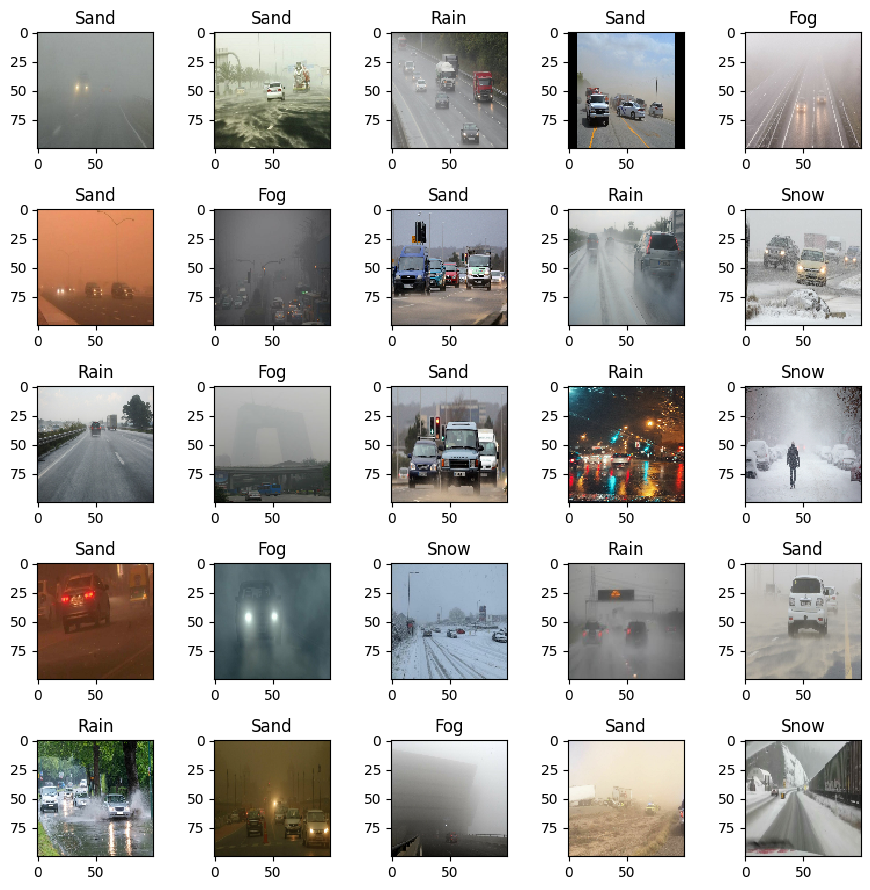

In [7]:
# change the default figure size for all plots created in the program

plt.rcParams['figure.figsize'] = (9,9)

labels =  ['Fog', 'Rain', 'Sand', 'Snow']

for i in range(25):
    # plt.subplot() function takes three integer arguments: the number of rows, the number of columns, and the index of the subplot.
    plt.subplot(5,5,i+1)
    # plt.imshow() function displays the image at index i in the X_train array as a grayscale image, with no interpolation applied.
    plt.imshow(X_train[i], interpolation='none')
    # Get the index of the true label using np.argmax
    plt.title("{}".format(labels[np.argmax(Y_train[i])])) # Corrected line

plt.tight_layout()

<a id = "cell_model"></a>
## 3. AI Model Development

*Create and explain your models (e.g., model architecture, model parameters). Evaluate the models on the experimental data sets. You only need to show the code of one model with the best performance. However, you should do various experiments with different models and model architectures and keep records of their performance, which will be included in the experiment report section below.*

## AI Model Development

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten
from tensorflow.keras.layers import MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard, Callback, EarlyStopping
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Nadam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import regularizers
from keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import cohen_kappa_score
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Model 14

# CNN (1-Conv, 1-Pool, 2 Dropout, Dense=64)

In [139]:
def model_14():
  model = Sequential()
  model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_rows, img_cols, channels)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(4, activation='softmax'))
  model.summary()
  return model

# Instantiate Model 14
model14 = model_14()

keras_callbacks = [EarlyStopping(monitor='val_loss', patience=100, verbose=0)]
# Compile Model 14

model14.compile(optimizer='adam', loss=CategoricalCrossentropy(), metrics=['accuracy'])

# Train Model 14
keras_callbacks = [EarlyStopping(monitor='val_loss', patience=10)]
hist14 = model14.fit(
    X_train, Y_train,
    batch_size=64,
    epochs=100,
    verbose=2,
    validation_data=(X_test, Y_test),
    validation_split=0.2,
    callbacks=keras_callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_78 (Conv2D)              │ (None, 98, 98, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_78 (MaxPooling2D) │ (None, 49, 49, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 49, 49, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_35 (Flatten)            │ (None, 38416)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 64)             │     2,458,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,459,396 (9.38 MB)

 Trainable params: 2,459,396 (9.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
12/12 - 8s - 659ms/step - accuracy: 0.3370 - loss: 3.3085 - val_accuracy: 0.3657 - val_loss: 1.2546
Epoch 2/100
12/12 - 6s - 479ms/step - accuracy: 0.4443 - loss: 1.1691 - val_accuracy: 0.5534 - val_loss: 1.1278
Epoch 3/100
12/12 - 9s - 768ms/step - accuracy: 0.5404 - loss: 1.0358 - val_accuracy: 0.4725 - val_loss: 1.0841
Epoch 4/100
12/12 - 6s - 529ms/step - accuracy: 0.5669 - loss: 0.9744 - val_accuracy: 0.6181 - val_loss: 0.9424
Epoch 5/100
12/12 - 9s - 746ms/step - accuracy: 0.5891 - loss: 0.9315 - val_accuracy: 0.5955 - val_loss: 0.8964
Epoch 6/100
12/12 - 6s - 483ms/step - accuracy: 0.5989 - loss: 0.8993 - val_accuracy: 0.5825 - val_loss: 0.8930
Epoch 7/100
12/12 - 5s - 399ms/step - accuracy: 0.6379 - loss: 0.8681 - val_accuracy: 0.5922 - val_loss: 0.8906
Epoch 8/100
12/12 - 4s - 340ms/step - accuracy: 0.6407 - loss: 0.8244 - val_accuracy: 0.7055 - val_loss: 0.7778
Epoch 9/100
12/12 - 5s - 427ms/step - accuracy: 0.6727 - loss: 0.7731 - val_accuracy: 0.7152 - val_loss:

# Evaluate the model

In [147]:
# Evaluate on training data
train_score = model14.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', round(train_score[0], 4))
print('Train accuracy:', round(train_score[1], 4), '\n')

# Evaluate on test data
test_score = model14.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', round(test_score[0], 4))
print('Test accuracy:', round(test_score[1], 4))


Train loss: 0.1511
Train accuracy: 0.9582 

Test loss: 0.5572
Test accuracy: 0.7864


# Computing the **accuracy, precision, recall, f1-score, and support**

In [142]:
y_pred_14 = model14.predict(X_test)

y_pred_continuous_14 = np.round(y_pred_14)

# Convert the predicted labels to multiclass format
y_pred_multiclass_14 = np.argmax(y_pred_14, axis=1)
y_test_multiclass = np.argmax(Y_test, axis=1)

# Calculate the kappa score
kappa_14 = cohen_kappa_score(y_test_multiclass, y_pred_multiclass_14)
print("The result of Kappa is :", round(kappa_14, 3))

report = classification_report(y_test_multiclass, y_pred_multiclass_14, target_names=labels)

# Print the report
print("The result of the classification report is: \n ",report)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step
The result of Kappa is : 0.71
The result of the classification report is: 
                precision    recall  f1-score   support

         Fog       0.71      0.82      0.76       100
        Rain       0.68      0.53      0.60        64
        Sand       0.92      0.84      0.88        81
        Snow       0.84      0.92      0.88        64

    accuracy                           0.79       309
   macro avg       0.79      0.78      0.78       309
weighted avg       0.79      0.79      0.78       309



<a id = "cell_report"></a>
## 4. Experiments Report

Provide a summary of results based on your experiments. Use table or figure to summarize the performance of various models. Identify the model with the best performance. Critically evaluate your developed solution, explain how your model can be used to address the related business problem and what should be considered when deploying your model for real world applications.

**A summary**: In this project, fourteen CNN models were developed and tested on a dataset of 1027 real-world traffic images. These models varied in several components, including the number of convolutional layers (ranging from 1 to 3), pooling layers (from 1 to 4), dropout usage ranging from 0.2 to 0.4, dense layer size from 64 to 256, and optimizer choice, which were Adam and RMSprop. This variation enabled systematic exploration regarding how depth, regularization, and training dynamics impacted performance on the weather classification task.

**The model with the best performance:**

Model 14 achieved the best performance with an accuracy is 79%, a Cohen's Kappa score of 0.71, and a macro F1 score of 0.78. This model had a simple architecture because it is suitable for this dataset: 1 convolutional layer, 1 pooling layer, 2 dropout layers for regularization, a dense layer with 64 units, and used the Adam optimizer. Its balanced complexity likely contributed to the good performance, sufficient to capture significant features from the images without overfitting to the training data. In addition, dropout layers were used to reduce overfitting, and with the Adam optimizer, the training was more effective and reliable. Conversely, the other models with additional dense units or deeper convolutional layers underperformed and showed signs of overfitting due to the small dataset size. Therefore, Model 14 is the best model that maintains the most appropriate balance between learning ability and generalization.

**The worst performing weather condition**: Rain.

This happens because in the heavy rain, the object may not have proper visibility to identify what it is trying to look at due to occlusion and distortions. The rain will blur the borders as well as refract light, which will reduce brightness. Additionally, the raindrop will obstruct the camera, which leads to incorrect detection. This effect makes it difficult for the model can distinguish rain from other weathers, particularly snow (Mudavath & Mamidi, 2025).

**The suitability of my developed solution for deployment in real-world applications:**
This model shows strong potential for real-world deployment due to its solid performance on diverse data, achieving 79% accuracy and a Cohen’s Kappa score of 0.71, indicating substantial agreement even in the presence of imbalanced or noisy data. This implies that this model has learned meaningful patterns for weather classification. However, classification error for rain indicates the model's limitation under real-world variability, like poor lighting, occlusion, or feature clustering. Therefore, we need further strategies to improve the model's accuracy and its robustness for continuous and real-time deployment.

**The potential approaches to improve the weather recognition solution:**
When developing a weather recognition system that functions in a real-world setting, the appropriate data is very important. This means going beyond just clear skies, and the data must include a variety of weather conditions like rain, snow, fog, sand, and mixtures of these. It is also important to capture data from different times in a day and different locations, as well as different types of cameras, like dash cameras, drones, or street surveillance cameras. Just in case certain weather conditions are rare, synthetic data or simulated weather effects can help to fill in the gaps. Besides that, using a multi-label classification approach can also help. Weather is not always singular, it can be foggy and raining or cloudy with snow. Therefore, multi-label classification can help the system tag multiple conditions in a single image. This improves prediction accuracy, as well as the system's adaptability to real-world scenarios.






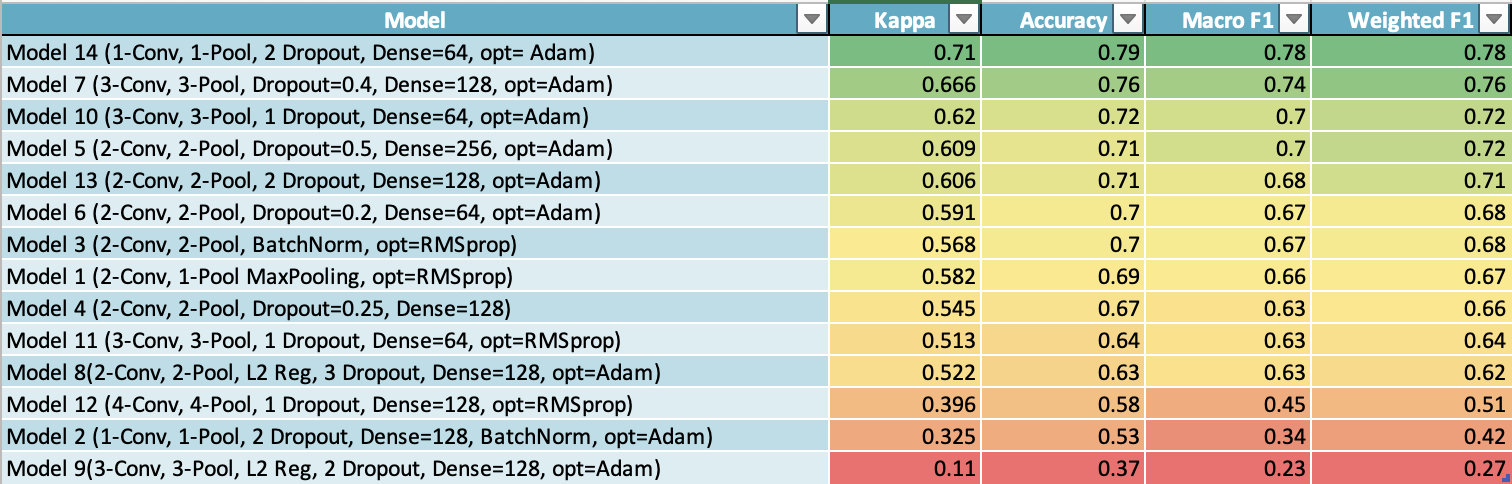

In [1]:
from IPython.display import Image, display
display(Image(filename='result_task2.png', width=1000))

# Plot history of learning

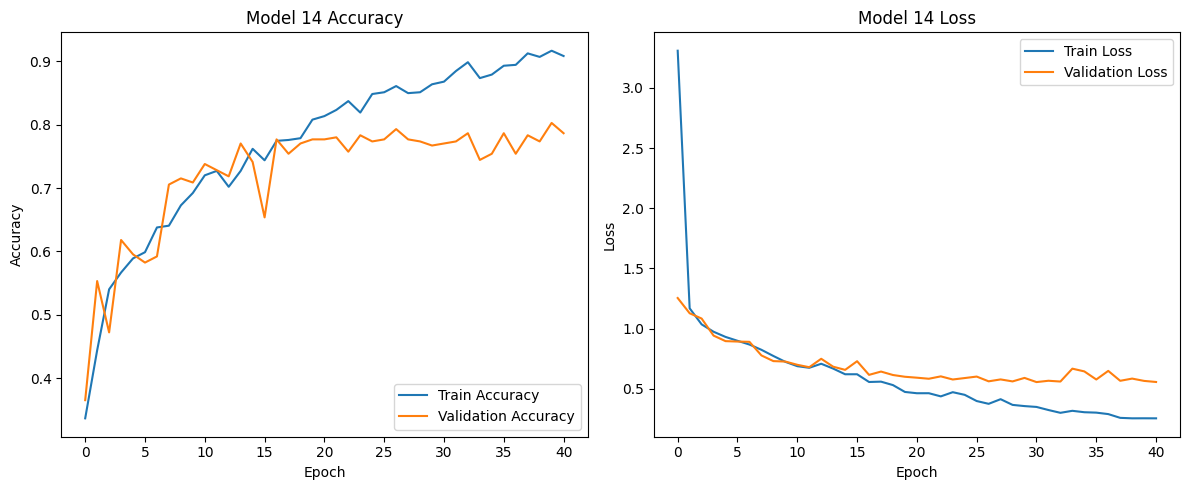

In [148]:
import matplotlib.pyplot as plt

# Function to plot training and validation accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model 14 Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model 14 Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Call the function to plot the history of Model 14
plot_history(hist14)

In [154]:
y_pred_14

array([[4.5606527e-01, 4.7926885e-01, 5.9630074e-02, 5.0358837e-03],
       [1.9634364e-02, 7.1727850e-02, 7.1749336e-01, 1.9114439e-01],
       [3.5947675e-04, 3.2194059e-06, 9.9963665e-01, 6.0483114e-07],
       ...,
       [5.3488816e-06, 2.3176747e-03, 4.6212858e-08, 9.9767691e-01],
       [2.8096977e-01, 3.6261410e-02, 6.8181694e-01, 9.5185725e-04],
       [2.0704344e-01, 7.8822024e-02, 7.1082240e-01, 3.3120906e-03]],
      dtype=float32)

# Confusion Matrix for inspection

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step


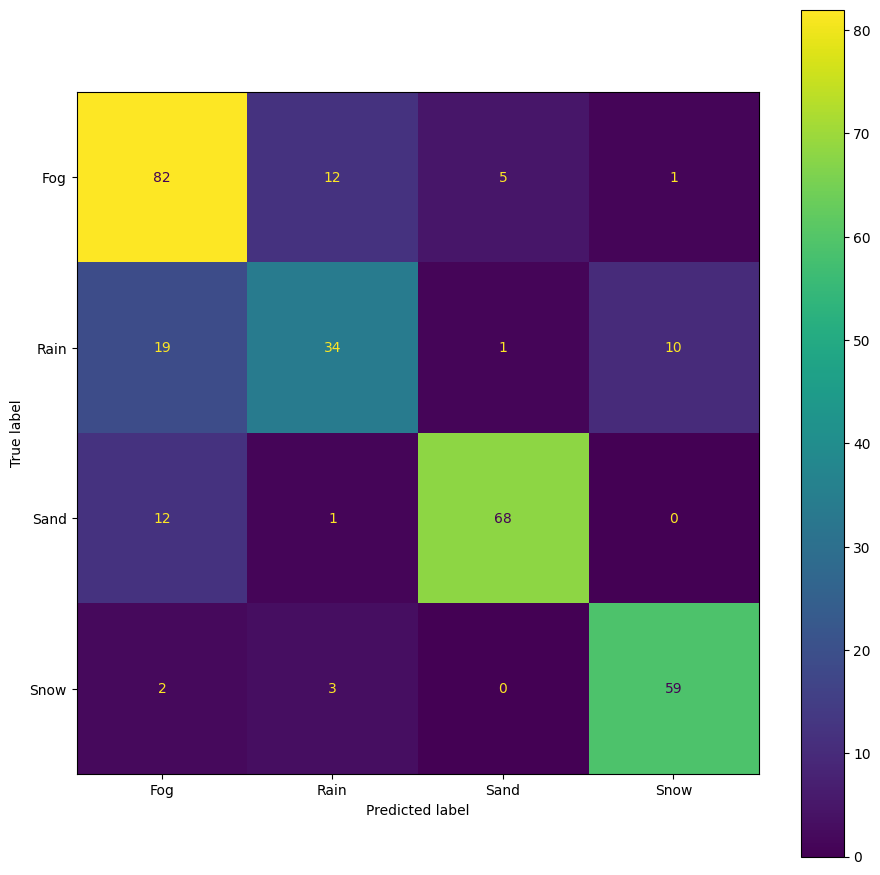

In [146]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(
    np.argmax(Y_test, axis=1),  # True labels
    np.argmax(model14.predict(X_test), axis=1)  # Predicted labels
)

# Create a ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=class_names  # Assuming `class_names` is defined
)

# Create a figure with a larger size
fig = plt.figure(figsize=(11, 11))

# Create a subplot within the figure
ax = fig.subplots()

# Plot the confusion matrix as a heatmap
display.plot(ax=ax)

# Show the plot
plt.show()

# Print sample predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


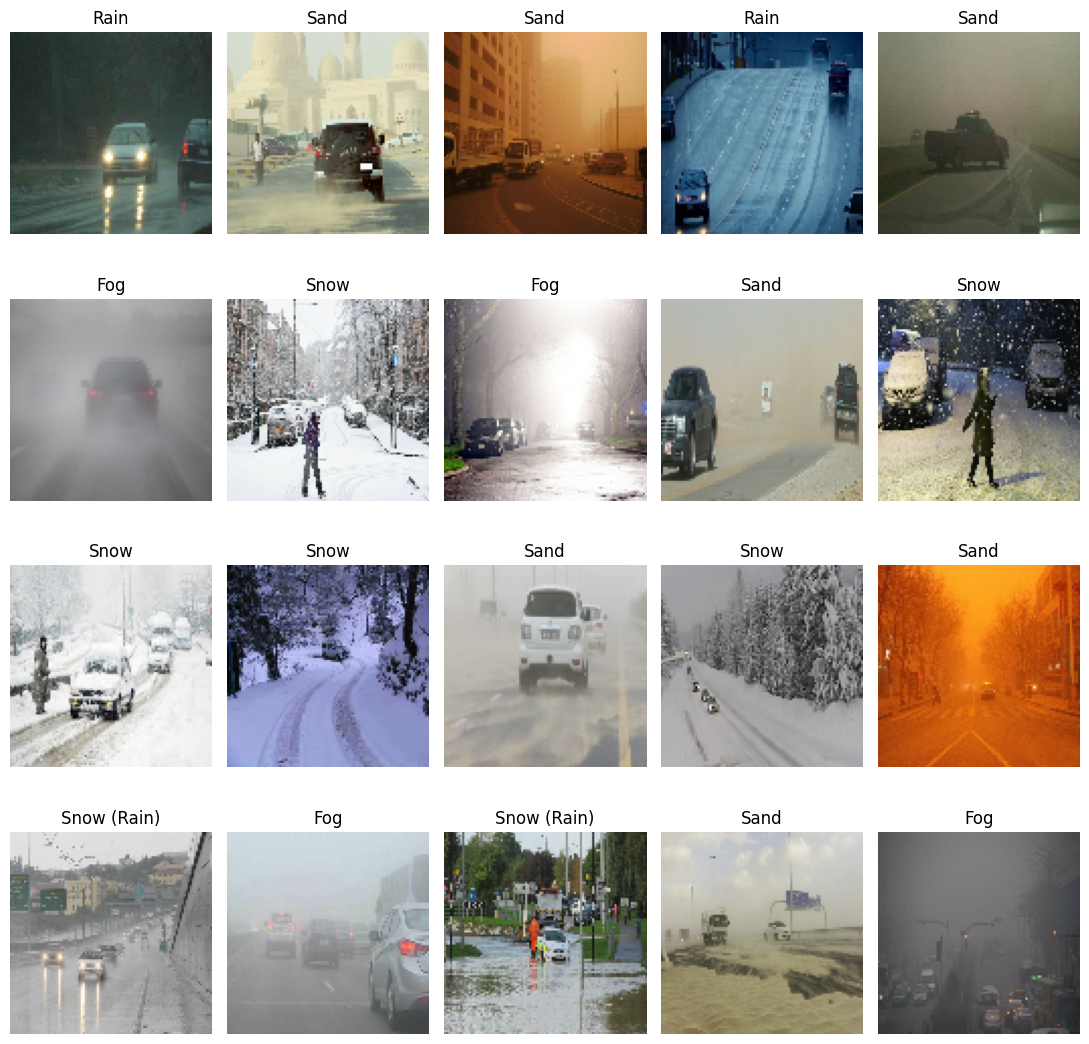

In [144]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images(images, cols=5, figsize=(11, 11), titles=None):
    """
    Displays a list of images in a grid.

    Args:
    - images: A list or NumPy array of images.
    - cols: Number of columns in the grid.
    - figsize: Tuple specifying the figure size.
    - titles: Optional list of titles for each image.
    """
    num_images = len(images)
    rows = (num_images + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    for i, image in enumerate(images):
        ax = axes[i // cols, i % cols]
        ax.imshow(image)
        ax.axis('off')

        if titles is not None and i < len(titles):
            ax.set_title(titles[i])

    # Remove empty subplots
    for i in range(num_images, rows * cols):
        fig.delaxes(axes[i // cols, i % cols])

    plt.tight_layout()
    plt.show()

# Define the range of images to display
img_range = range(20)
imgs = X_test[img_range]  # Use X_test for test images

# Define class names
class_names = ['Fog', 'Rain', 'Sand', 'Snow']  # Update class names as needed

# Get true labels
true_labels = [class_names[np.argmax(x)] for x in Y_test[img_range]]

# Get predictions from Model 8
predictions = model14.predict(imgs.reshape(len(img_range), img_rows, img_cols, channels))
pred_labels = [class_names[np.argmax(x)] for x in predictions]

# Create titles for the images
titles = [pred_labels[x] + ('' if true_labels[x] == pred_labels[x] else ' (' + true_labels[x] + ')') for x in img_range]

# Plot the images with their predicted and true labels
plot_images(imgs, cols=5, figsize=(11, 11), titles=titles)

## Reference

Mudavath, T., & Mamidi, A. (2025). Object detection challenges: Navigating through varied weather conditions—Acomprehensive survey. Journal of Ambient Intelligence and Humanized Computing. https://doi.org/10.1007/s12652-025-04956-6

Tarwani, H., Patel, S., & Goel, P. (2025). Deep learning approach for weather classification using pre-trained convolutional neural networks. Procedia Computer Science, 252, 136–145. https://doi.org/10.1016/j.procs.2024.12.015